![](../../images/header.png)

# Mapping the Universe

Author: Hernan Rincon

The DESI Survey is making a giant, three-dimensional map of the universe. This map will allow scientists to study some of the biggest mysteries in physics, chief among them being the nature of dark energy. Most maps that you see in your day-to-day life are two-dimensional, so it may be hard to picture what a three dimensional map looks like in your head. This notebook will detail how DESI is creating its map of the universe, what this map looks like, and how you can create your own version of such a map with DESI data.

By the end of this notebook, you should be able to:
- Read maps of the night sky wiht right ascension and declination coordinates
- Understand the concept of a survey footprint and how DESI observes the night sky wiht overlapping survey tiles
- Create a three-dimensional map of DESI galaxies along with a corresponding two-dimensional cross section

## Preferred Backgrounds
While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:

- How Jupyter cells work
- How to depict data visually by using graphs


In [1]:
# Run this cell to load the basic Python packages we need to run this notebook
import numpy as np
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt


## 1 - Map Projections

Before we discuss maps of the universe, let's first introduce maps of the Earth. Since our planet Earth is a sphere, we will often make maps that are **projections** of this sphere onto a flat surface, like the one seen below.

<img src="../../images/Earth-Mollweide-projection.jpg" alt="" width="600"/>

Image credit: NASA

Maps that are projections will often distort the shapes of Earth's continents in order to represent a three-dimensional planet on a two-dimensional surface. That is the case for the map pictured above.

Maps of the night sky can also be projected onto a two-dimensional map. The below map is one such example. This map shows the band of the Milky Way galaxy, which you can see by eye in dark night skies far from cities.

<img src="../../images/Milky_Way_infrared.jpg" alt="" width="600"/>

Image Credit: Two Micron All Sky Survey

As is the case for Earth's continents, objects in the night sky may appear distorted by the projection of the map. To better understand how this distortion behaves, let's make our own map of the night sky. We will use data from the WMAP collaboration that tells us how hot or cold the electromagnetic radiation in different parts of the night sky is.

First, let's load in the WMAP temperature data.

In [28]:
# load in temperature map data
sky_map = hp.read_map('../../desihigh/wmap_band_iqumap_r9_7yr_W_v4.fits')

Now let's create a map of the temperature of the night sky. The appearance of the map will depend on the rotation at which we view it. Run the below cell to create the map.

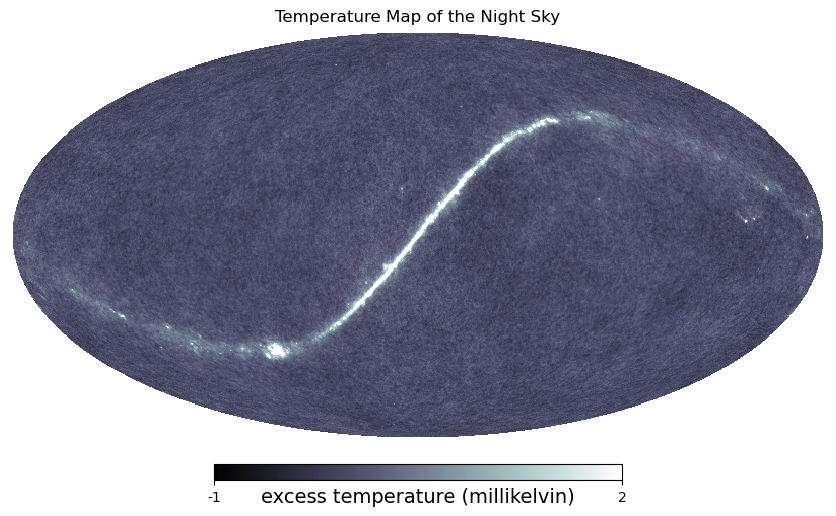

In [37]:
# Try changing the value of map_rotation_angle to various 
# values between 0 and 360 degrees and observe how the 
# apparence of the map changes

map_rotation_angle = 45 # in units of degrees

hp.mollview(
    sky_map,
    rot = (0, 0, map_rotation_angle),
    title="Temperature Map of the Night Sky",
    unit="excess temperature (millikelvin)",
    min=-1,
    max=2,
    cmap = mpl.colormaps['bone']
)



The band of the Milky Way once again appears in the map, but now it appears curved due to the distortion of the map projection.

**Now it's your turn: Change the `map_rotation_angle` value in the above code and note how viewing the map from different angles changes the appearance of the Milky Way. Find a value of `map_rotation_angle` that causes the Milky Way to appear flat.**

### 1.1 - The DESI footprint

Now that you've gotten a sense for mapping 2D projections of the night sky, let's focus on the regions of the night sky that DESI is interested. The angular region of the nhgt sky within which a survey takes data is called the **survey footprint**. The Band of the Milky Way galaxy blocks our view of the distant galaxies behind it, so DESI instead focuses on the regions above and below the band of the Milky Way. These two regions are called the DESI North Galactic Cap footprint and the DESI South Galactic Cap footprint, and they are shown on the below map. The North Galactic cap is the larger of the two regions.

<img src="../../images/dr1-bright-progress.png" alt="" width="600"/>

There are a few additional elements in this map. The green shaded regions shows the survey completion progress of DESI by the time of its first public data release. We've also introduced two numbers, right ascension (R.A.) and declination (Dec.), that form a coordinate system which we can use to label the position of objects in the night sky. Right ascension and declination work just like longitude and latitude on Earth.

Now that we know what regions of the night sky we’re going to map, it’s time to start taking data! You learned in the Galaxy Spectra notebook how DESI captures light from distant galaxies with optical fibers and CCD images. The DESI instrument is attached to the Mayall telescope, which is shown below.

<img src="../../images/Mayall-DR1.jpg" alt="" width="600"/>


Image credit: DESI Collaboration.

To start taking data, we point the Mayall telescope to a particular location in the night sky. We can then observe galaxies in a small, circular patch of the night sky that we call a tile. Once we’re done taking data, we move the telescope to point at a new new tile elsewhere in the sky, and we repeat this process again and again. The below image shows three close together DESI tiles in the night sky that are labeled with blue circles.

<img src="../../images/desi-tiles.png" alt="" width="600"/>

Image credit: DESI Collaboration.

On any night, DESI has a plan for observing a set of tiles. For example, the plan for the night 2021-09-22 is shown below. The plan starts with the date, followed by a list of times at which noon, dusk, and dawn occur, along with the times at which the moon rises and sets. This is followed by a table of DESI tiles to be observed. The `local` column tells us what time to observe each tile at, and the `ra` and `dec` columns tell us the location of the tiles on the night sky.

Let's use the information from this nightly plan to plot the path that DESI takes across the night sky. I've transferred the R.A. and declination data from the plan into python lists. **Now, you should use the `matplotlib` python package to plot the declination values on the y-axis and R.A. values on the x-axis. When you’re done, you’ll be able to see the path through the sky that DESI takes on a night of observations. Make sure to include axis labels and a title for the plot.**

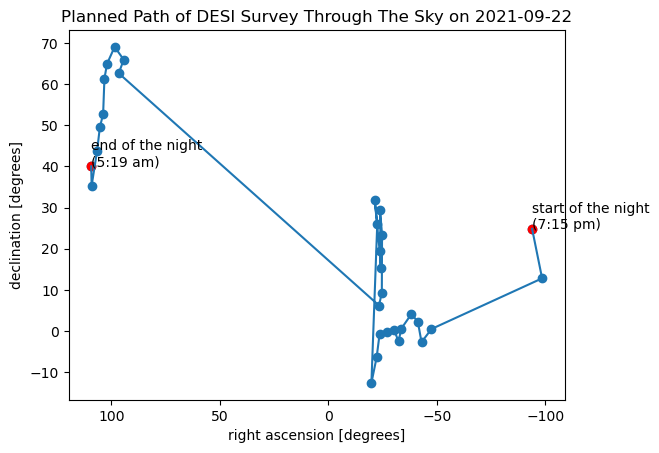

In [39]:
ra = [
   266.0, 261.4, 312.4, 317.0, 318.7, 321.7, 326.3, 327.6, 329.6, 333.0, 336.3, 337.7, 340.1, 
   337.4, 338.6, 336.3, 335.8, 336.1, 335.2, 335.3, 336.6, 96.6, 94.3, 98.5, 102.0,
   103.2, 103.8, 105.3, 106.6, 109.1, 109.3
]


ra = np.array(ra)
ra = (ra - 150)%360 + 150 - 360

declination = [
   24.8, 12.8, 0.5, -2.7, 2.3, 4.1, 0.6, -2.5, 0.2, -0.2, -0.6, -6.4, -12.6, 26.1, 31.9, 19.4, 
    15.3, 29.3, 23.4, 9.3, 6.2, 62.6, 65.9, 69.0, 64.9, 61.3, 52.7, 49.5, 43.7 , 35.3, 40.0
]

# YOUR CODE GOES HERE
# Create a plot showing the desi tiles in the plan for 2021-09-22
# Hint: use plt.scatter to show the individual tiles 
# and plt.plot to show the path connecting them

plt.scatter([-94.0, 109.3], [24.8, 40.0], color='red')
plt.text(-94.0, 24.8, 'start of the night\n(7:15 pm)')
plt.text(109.3, 40.0, 'end of the night \n(5:19 am)')

plt.gca().invert_xaxis()

Compare your plot with the DESI footprint map we saw before. **Did DESI plan to observe in both the North Galactic Cap footprint and the South Galactic Cap footprint on 2021-09-22?**

<img src="../../images/dr1-bright-progress.png" alt="" width="600"/>

The green circles in the above map are individual DESI tiles. As the DESI survey carries on, multiple overlapping tiles pile up to cover the entire DESI footprint. You can see this overlapping coverage staring to take effect in the dark green regions.

Now that we have a plan for the night, it’s time for our collaboration members to start observing. Much of the observing process can be controlled and monitored from the observing console station, which is in the same building as the telescope. Observing on 2021-09-22 started at 7:15 pm and ended at 5:19 am. DESI observers have to stay up all night to work!

<img src="../../images/observing_console.jpg" alt="" width="600"/>

Image credit: Claire Lamman

A night of observing won’t always go according to schedule. Clouds, weather, atmospheric conditions, and problems with observing equipment can all cause less tiles to be observed on a particular night than are planned.

# 2 - Mapping Cross Sections of DESI Data

Now that you've had a chance to examine two-dimensional maps of the night sky, we're going to move to three-dimensional maps. It's not straightforward to make maps of three-dimensional structures when out map pages (or our computer screens) are flat, two-dimensional surfaces. However, one trick that we can use is to plot a cross-section of a structure, meaning that we plot a flat, two-dimensional slice through the middle of the structure. For example, cross-sections of the Earth show the underground layers of our planet that are normally hidden from our eyes.

<img src="../../images/MTU-Earth-cross-section.jpg" alt="" width="600"/>

Image Credit: U.S. Geological Survey

We can create a similar cross section of DESI data to visually depict our universe. The maps we’ve seen so far don’t tell us how far away distant galaxies are from us, only where they appear in our night sky. But with DESI’s distance measurements of galaxies, we can create a cross-sectional map of the universe with the distances between galaxies now depicted. When we do that, we get something like the image below.

<img src="../../images/MTU-cross-section.jpg" alt="" width="600"/>

Image Credit: D. Schlegel and LBNL

In the above map, each dot of light is an entire galaxy. There are tens of millions of them depicted here, with our own galaxy placed at the center of the map. You'll notice that there are dark wedges on the map where there appear to be no galaxies. These dark wedges are the result of the Milky Way galaxy blocking our view of certain parts of the sky. There are countless galaxies in these regions, but they are hidden from DESI.

Now lets make our own map of DESI's galaxies. We will import the `get_x_y_z_region` function and use it to load up the X, Y, and Z positions of galaxies on a cubic grid. These galaxies come from the first public release of DESI data.

In [2]:
# REMOVE FROM FINAL VERSION
import sys
sys.path.insert(1, '/global/homes/h/hrincon/code/desihigh/')


In [81]:
from desihigh.galaxies import get_x_y_z_region

# load galaxy positions
x_positions, y_positions, z_positions = get_x_y_z_region()

How many galaxies have we loaded in? Our `x_positions` variable is a numpy array, and we can use the `shape` property to report how many galaxies there are.

In [82]:
x_positions.shape

(28284,)

That's quite a lot of galaxies! To make it easier to depict the galaxies in a three-dimensional plot, let's cut them down to a smaller region of space. To do so, we are going to create a **boolean mask** variable that selects only those galaxies that meet special conditions. The conditions we want to impose are

 - X Positions > -640 Mpc/h
 - X Positions < -560 Mpc/h
 - Y Positions > -200 Mpc/h
 - Y Positions < -120 Mpc/h
 - Z Positions > -40 Mpc/h
 - Z Positions < 40 Mpc/h

The galaxies that meet these conditions will fill a cube with a side length of 80 Mpc/h. Our units of distance are $\text{Mpc}/h$, with one $\text{Mpc}/h$ equaling about five million lightyears. We'll create our boolean mask with the below code.

In [83]:
select_x = (x_positions > -640) * (x_positions < -560)

select_y = (y_positions > -200) * (y_positions < -120) 

select_z =  (z_positions > -40) * (z_positions < 40)

select_galaxies = select_x * select_y * select_z


Now let's use our boolean mask to cut down the number of galaxies that we will plot.

In [84]:
print(f'We start with {x_positions.shape[0]} galaxies')

x_positions = x_positions[select_galaxies]
y_positions = y_positions[select_galaxies]
z_positions = z_positions[select_galaxies]

print(f'After applying our mask, we have {x_positions.shape[0]} galaxies')


We start with 28284 galaxies
After applying our mask, we have 5636 galaxies


Now run the below cell to create a three-dimensional map of DESI galaxies

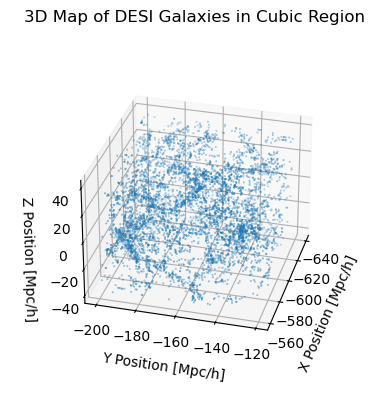

In [68]:
plot_rotation = 15


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_positions, y_positions, z_positions, s = 0.1)

ax.set_xlabel('X Position [Mpc/h]', labelpad=10)
ax.set_ylabel('Y Position [Mpc/h]', labelpad=10)
ax.set_zlabel('Z Position [Mpc/h]', labelpad=10)

plt.title('3D Map of DESI Galaxies in Cubic Region')

ax.set_box_aspect(None, zoom=0.78)

ax.view_init(azim=plot_rotation)

plt.show()

Because we're trying to represent a three dimensional map on a two-dimensional screen, the result can be non-intuitive to look at. It may help to **vary the `plot_rotation` parameter in the above code**, which will allow you to view the plot from different angles.

To make our plot easier to understand, let's turn it into a two-dimensional cross section. **Create a boolean mask `select_cross_section` that selects a 10 Mpc/h-wide slice of galaxies in the X-Y plane, and use the below code to plot the slice that you created.**

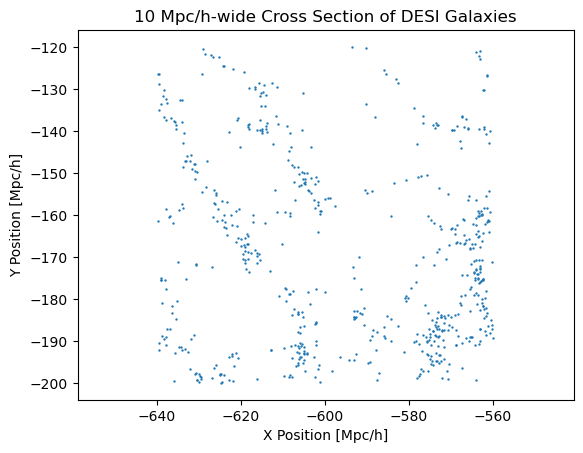

In [75]:
select_cross_section = # YOUR CODE GOES HERE

plt.scatter(x_positions[select_cross_section], y_positions[select_cross_section], s=0.5)
plt.axis('equal')
plt.title('10 Mpc/h-wide Cross Section of DESI Galaxies')
plt.xlabel('X Position [Mpc/h]')
plt.ylabel('Y Position [Mpc/h]')
plt.show()

You might notice in your cross-sectional map that some regions have many galaxies, and some regions have few galaxies. The way in which galaxies cluster together tells us about the evolutionary history of our universe and the underlying mathematical model of cosmology that describes it. 

In the earliest era of our universe that we can observe, the matter within it was evenly distributed. Some regions were slightly denser than others, but these variations in density were small, on the order of one part-per-hundred-thousand. Over the billions of years that followed, gravity caused these slightly overdense regions to collapse and form structures. Under the influence of gravity, the once uniform universe evolved to develop galaxies, clusters of galaxies, and highly overdense regions on its largest scales. These overdensities are what form the dense regions visible in your cross-sectional map.

We can use the distribution of galaxies in a map of the universe to test our models of dark energy and gravity and to better understand cosmology as a whole. We will turn in subsequent notebooks to examining the scientific analyses that are performed with DESI data. 

If we zoom out of our cross-sectional map, we can construct similar cross-sectional maps that span the entire DESI survey volume. An example of such a map is shown below.

<img src="../../images/MTU-DESI-map.png" alt="" width="600"/>

Image Credit: Claire Lamman and the DESI Collaboration

Once again, we can see that galaxies cluster together to form web-like structures. What if we want to depict this map in three dimensions rather than using a cross section? As we saw before, three-dimensional maps can be challenging to depict on a two-dimensional screen. It helps however if we make our map intereactive, allowing us to move though it and rotate our field of view in real time. The DESI member Otavio Alves has created an interactive map that we can use to view DESI galaxies. **Try visiting https://fly.otavioalves.com/ and use your computer mouse to explore the universe as revealed by DESI.**


## Conclusion

In this notebook, we have ...

![](../../images/footer.png)

<details>
  <summary><h6>Code solutions, do not open if not allowed</h6></summary>
  
**Exercise 1 : Projecting the Milky Way**
```python
# Try changing the value of map_rotation_angle to various 
# values between 0 and 360 degrees and observe how the 
# apparence of the map changes

map_rotation_angle = 0 # in units of degrees

hp.mollview(
    sky_map,
    rot = (0, 0, map_rotation_angle),
    title="Temperature Map of the Night Sky",
    unit="excess temperature (millikelvin)",
    min=-1,
    max=2,
    cmap = mpl.colormaps['bone']
)
```

**Exercise 2 : DESI's Path Through the Night Sky**
```python
ra = [
   266.0, 261.4, 312.4, 317.0, 318.7, 321.7, 326.3, 327.6, 329.6, 333.0, 336.3, 337.7, 340.1, 
   337.4, 338.6, 336.3, 335.8, 336.1, 335.2, 335.3, 336.6, 96.6, 94.3, 98.5, 102.0,
   103.2, 103.8, 105.3, 106.6, 109.1, 109.3
]


ra = np.array(ra)
ra = (ra - 150)%360 + 150 - 360

declination = [
   24.8, 12.8, 0.5, -2.7, 2.3, 4.1, 0.6, -2.5, 0.2, -0.2, -0.6, -6.4, -12.6, 26.1, 31.9, 19.4, 
    15.3, 29.3, 23.4, 9.3, 6.2, 62.6, 65.9, 69.0, 64.9, 61.3, 52.7, 49.5, 43.7 , 35.3, 40.0
]

# show the connected path that DESI takes through the night sky

plt.plot(ra, declination)
# show the locations of the indicidual tiles on the path
plt.scatter(ra, declination)

plt.xlabel('right ascension [degrees]')
plt.ylabel('declination [degrees]')
plt.title('Planned Path of DESI Survey Through The Sky on 2021-09-22')

plt.scatter([-94.0, 109.3], [24.8, 40.0], color='red')
plt.text(-94.0, 24.8, 'start of the night\n(7:15 pm)')
plt.text(109.3, 40.0, 'end of the night \n(5:19 am)')

plt.gca().invert_xaxis()

```

**Exercise 3 : Creating a Cross Section of DESI Galaxies**
```python
select_cross_section = (z_positions > -5) * (z_positions < 5)

plt.scatter(x_positions[select_cross_section], y_positions[select_cross_section], s=0.5)
plt.axis('equal')
plt.title('10 Mpc/h-wide Cross Section of DESI Galaxies')
plt.xlabel('X Position [Mpc/h]')
plt.ylabel('Y Position [Mpc/h]')
plt.show()
```

  </details>